In [135]:
import torch
from modular_dnn import BlockDiagonalDNN
results = torch.load('/mnt/ssd-apollo/jake/rib/experiments/counterexamples/results/small_modular_dnn_seed1_n10_k5_layers3_random_act_identity_dsize_2048_bias0/rib_graph.pt')

In [136]:
results.keys()

dict_keys(['exp_name', 'gram_matrices', 'interaction_rotations', 'eigenvectors', 'rib_edges', 'neuron_edges', 'pca_edges', 'model_config_dict', 'mlp'])

In [137]:
mlp = BlockDiagonalDNN(3,10)
mlp.load_state_dict(results['mlp'])

<All keys matched successfully>

In [138]:
mlp.layers[3].W.data

tensor([[ 1.3420, -0.6658, -0.2153,  0.3321, -0.9340,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0222,  0.9835, -0.8254, -0.4087, -2.3702,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.1793,  0.7635, -0.1924, -0.6859, -0.7391,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [-1.2895,  0.0591,  1.2851, -1.2276, -0.3722,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 1.7714,  1.7485, -0.6598, -1.1961, -0.3023,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0255, -2.2674,  0.0938,
          0.4821,  0.0827],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.9507,  0.1301,  0.8630,
         -0.3124,  0.0256],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.1821,  0.2700, -0.4743,
          0.5774,  0.1758],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.3376, -1.2658, -2.0567,
          1.6701, -1.5656],
        [ 0.0000,  

In [122]:
results['model_config_dict']

{'exp_name': 'small_modular_dnn',
 'n': 10,
 'k': 5,
 'layers': 3,
 'dataset_size': 2048,
 'batch_size': 32,
 'seed': 1,
 'truncation_threshold': 1e-20,
 'n_intervals': 50,
 'dtype': torch.float32,
 'node_layers': ['layers.0', 'layers.1', 'layers.2', 'layers.3', 'output'],
 'datatype': 'random',
 'rotate_final_node_layer': True,
 'force': True,
 'hardcode_bias': 0,
 'activation_fn': 'identity'}

In [123]:
results['gram_matrices']['layers.0']

tensor([[ 0.9250,  0.0038,  0.0076,  0.0023,  0.0243, -0.0242, -0.0141, -0.0121,
          0.0254, -0.0017,  0.0278],
        [ 0.0038,  0.9893,  0.0259,  0.0191,  0.0081,  0.0183, -0.0147,  0.0149,
          0.0128, -0.0115, -0.0162],
        [ 0.0076,  0.0259,  0.9878,  0.0104, -0.0165,  0.0336, -0.0379, -0.0141,
         -0.0405,  0.0158,  0.0448],
        [ 0.0023,  0.0191,  0.0104,  0.9373, -0.0474, -0.0136,  0.0090, -0.0137,
          0.0263,  0.0117, -0.0148],
        [ 0.0243,  0.0081, -0.0165, -0.0474,  1.0000, -0.0267, -0.0333,  0.0037,
         -0.0373, -0.0011,  0.0029],
        [-0.0242,  0.0183,  0.0336, -0.0136, -0.0267,  0.9860, -0.0104,  0.0449,
          0.0240, -0.0040, -0.0541],
        [-0.0141, -0.0147, -0.0379,  0.0090, -0.0333, -0.0104,  1.0014, -0.0241,
          0.0035, -0.0142, -0.0191],
        [-0.0121,  0.0149, -0.0141, -0.0137,  0.0037,  0.0449, -0.0241,  1.0498,
          0.0199,  0.0084,  0.0032],
        [ 0.0254,  0.0128, -0.0405,  0.0263, -0.0373,  0

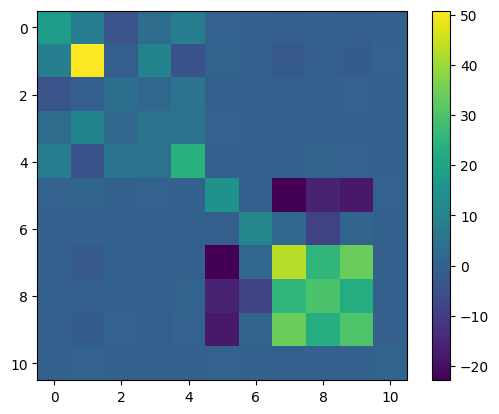

In [124]:
from matplotlib import pyplot as plt
import numpy as np
# plt.imshow(np.log(results['rib_edges'][0][1].detach().cpu().numpy()))
# plt.colorbar()
# plt.show()
plt.imshow(results['gram_matrices']['layers.2'].detach().cpu().numpy())
plt.colorbar()

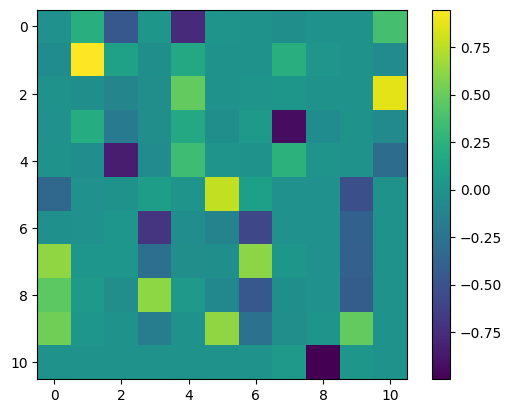

In [139]:

# plt.imshow(np.log(results['rib_edges'][0][1].detach().cpu().numpy()))
# plt.colorbar()
# plt.show()
plt.imshow(results['eigenvectors'][2]['U'].detach().cpu().numpy())
plt.colorbar()

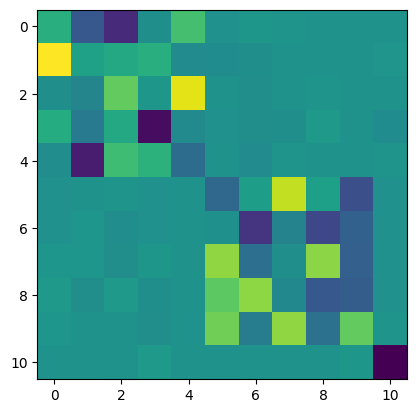

In [140]:
plt.imshow(results['eigenvectors'][2]['U'].detach().cpu().numpy()[:, [1,2,4,7,10,0,3,5,6,9,8]])


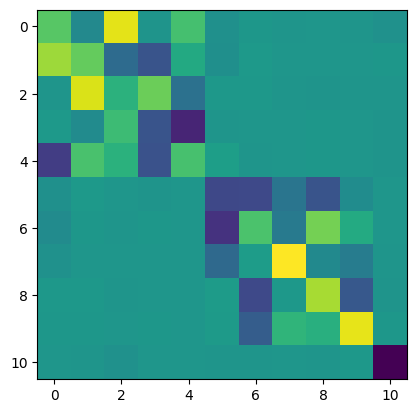

In [130]:
plt.imshow(results['eigenvectors'][3]['U'][:,[1,2,6,8,10,0,3,4,5,9,7]])

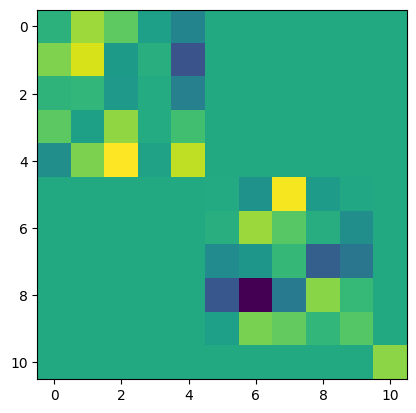

In [131]:
plt.imshow(mlp.layers[2].W.data)

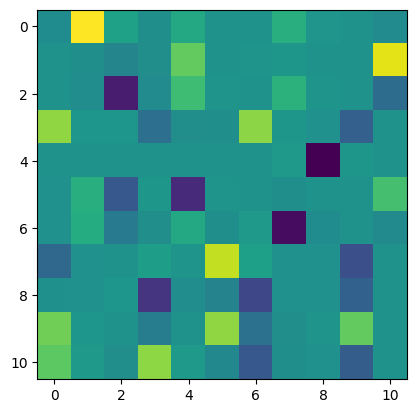

In [133]:
plt.imshow(results['eigenvectors'][2]['U'][[1,2,4,7,10,0,3,5,6,9,8],:])

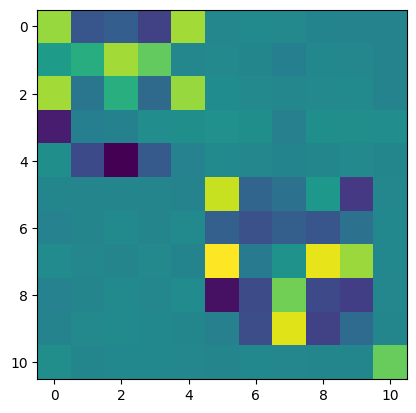

In [141]:
w_rotated = results['eigenvectors'][2]['U'][:,[1,2,4,7,10,0,3,5,6,9,8]] @ mlp.layers[2].W.data @ results['eigenvectors'][3]['U'][:,[1,2,6,8,10,0,3,4,5,9,7]].T
w_rotated = w_rotated.detach().cpu().numpy()
w_rotated = w_rotated
plt.imshow(w_rotated)


In [57]:
results['pca_edges'][2]

('layers.2',
 tensor([[2.4615e+02, 2.9174e+01, 2.4186e+00, 1.2200e+02, 4.8661e-01, 2.3776e+00,
          2.1361e-01, 6.7058e-02, 8.7826e-03, 9.3304e-01, 6.7084e-05],
         [1.1875e+01, 3.1952e+02, 6.0233e-02, 1.3778e+01, 1.7302e+00, 2.4910e-01,
          4.5422e-03, 3.6316e-01, 1.0020e-03, 9.8847e-02, 5.3748e-04],
         [3.7889e-01, 3.2759e-01, 2.1831e+02, 7.6171e-01, 6.0209e-01, 2.5192e-03,
          2.9326e-06, 9.1130e-02, 2.1017e-04, 2.3979e-03, 2.9717e-04],
         [1.9460e+01, 1.7600e-01, 4.2104e-02, 3.4924e+01, 1.5784e-01, 2.0831e-01,
          2.3311e+00, 1.0591e-02, 2.3536e-04, 1.0308e-01, 8.2913e-08],
         [1.1021e-02, 8.6717e-05, 4.1840e-05, 1.9926e-02, 4.3641e-07, 7.0898e+00,
          4.7295e-01, 1.9354e-03, 4.4894e-03, 4.2194e-01, 8.1126e-09],
         [5.7084e-02, 1.9559e-03, 8.1704e-04, 1.3468e-01, 8.3911e-02, 1.1488e-01,
          3.8504e+00, 1.7871e-03, 1.0031e-03, 4.1885e-01, 3.3764e-07],
         [1.9528e-04, 8.0676e-03, 5.2331e-03, 1.1693e-02, 9.3321e-01,

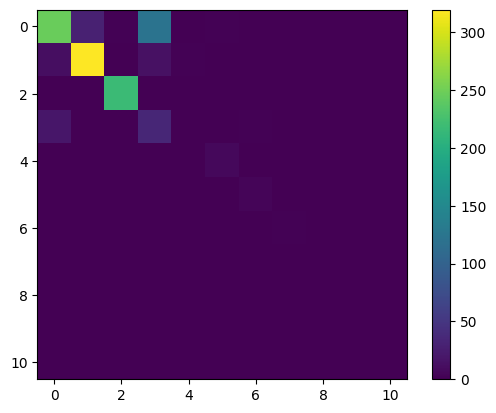

In [60]:
plt.imshow(results['pca_edges'][2][1])
plt.colorbar()

In [47]:
from scipy.cluster.hierarchy import linkage, leaves_list

def maximize_block_diagonal(matrix):
    """
    Reorders the columns of the given matrix to maximize its block diagonal structure.
    """
    # Step 1: Compute the similarity matrix
    # Here, we use a simple dot product between normalized columns as a similarity measure
    norm_matrix = matrix / np.linalg.norm(matrix, axis=0)
    similarity_matrix = np.abs(np.dot(norm_matrix.T, norm_matrix))

    # Step 2: Cluster the columns based on similarity
    # Using hierarchical clustering to find similar columns
    Z = linkage(1 - similarity_matrix, method='average')
    idx = leaves_list(Z)

    # Step 3: Permute the columns based on clustering result
    reordered_matrix = matrix[:, idx]

    return reordered_matrix

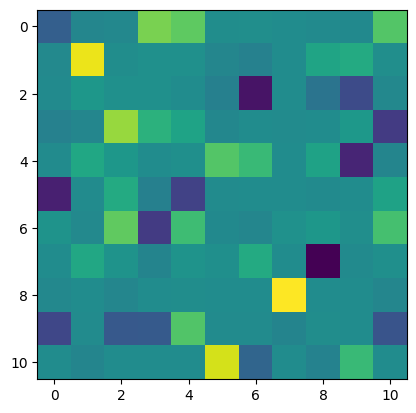

In [49]:
a = maximize_block_diagonal(results['eigenvectors'][2]['U'].detach().cpu().numpy())
plt.imshow(a)

In [15]:
from experiments.counterexamples.modular_dnn import RandomVectorDataset
from rib.hook_manager import HookedModel

model = BlockDiagonalDNN(n=10, layers=3)
model.load_state_dict(results['mlp'])
dataset = RandomVectorDataset(n=10, size=100, dtype=torch.float32)
X, y = dataset[:]



tensor([[293.4411, 427.2562,  51.4967,  ...,   0.0000,   0.0000,   1.0000],
        [273.3552, 385.5251,  47.2110,  ...,   0.0000,   0.0000,   1.0000],
        [295.4520, 429.6851,  47.0190,  ...,   0.0000,   0.0000,   1.0000],
        ...,
        [277.0787, 395.2541,  49.1043,  ...,   0.0000,   0.0000,   1.0000],
        [277.3449, 392.8207,  46.6059,  ...,   0.0000,   0.0000,   1.0000],
        [277.7760, 395.0203,  47.7284,  ...,   0.0000,   0.0000,   1.0000]])
proportion acts that are 0: tensor(0.3636)


In [16]:
hooked_model = HookedModel(model)
out, cache = hooked_model.run_with_cache(X)
print(cache.keys())
layer_0_acts = cache['layers.2.activation']['acts'][0]
print(layer_0_acts)
print("proportion acts that are 0:", (layer_0_acts == 0).float().mean())

dict_keys(['layers.0.activation', 'layers.1.activation', 'layers.2.activation', 'layers.3'])
tensor([[293.4411, 427.2562,  51.4967,  ...,   0.0000,   0.0000,   1.0000],
        [273.3552, 385.5251,  47.2110,  ...,   0.0000,   0.0000,   1.0000],
        [295.4520, 429.6851,  47.0190,  ...,   0.0000,   0.0000,   1.0000],
        ...,
        [277.0787, 395.2541,  49.1043,  ...,   0.0000,   0.0000,   1.0000],
        [277.3449, 392.8207,  46.6059,  ...,   0.0000,   0.0000,   1.0000],
        [277.7760, 395.0203,  47.7284,  ...,   0.0000,   0.0000,   1.0000]])
proportion acts that are 0: tensor(0.3636)


In [14]:
X[0], model.layers[0].W, model.layers[0].b

(tensor([ 0.0186, -1.1921,  1.0144, -0.9197,  2.3182,  0.8398, -0.3703, -0.4129,
         -0.7446, -0.5655]),
 Parameter containing:
 tensor([[-7.6937e-03,  2.6158e+00, -6.3858e-02,  2.6087e-01,  1.2374e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00],
         [-1.1198e-01, -1.7404e+00, -3.3985e-02,  5.2674e-01, -8.6073e-02,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00],
         [-1.6160e+00,  9.3433e-02, -1.3898e+00, -3.1046e-01,  2.6929e-01,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00],
         [ 1.4389e+00,  1.4151e+00, -8.0262e-01,  3.0364e-01, -2.0311e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00],
         [-2.6189e+00,  2.2544e+00, -1.1085e+00, -1.8874e+00, -8.6326e-02,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00